# Quiz-3


There are three tasks.

You'll see the tasks enclosed as follows.

---> YOUR TASK n <---

...task n ...
 
---> YOUR TASK n ENDS HERE<---

Goals:

* Design a DFA that we shall specify in Section 2 (begin XOR end with 01)

* Design a DFA we shall specify in Section 3 (for numbers, MSB first, equal to 0 mod 5, similar to Sec 5.2.3 from book)

* Practice some Pumping Lemma problems in Section 4. Answer the questions there

## YOUR TASKS

Your tasks will be denoted by "---> YOUR TASK n <---" below

In [3]:
from jove.DotBashers import *
from jove.Def_md2mc import *
from jove.Def_DFA   import *
from jove.LangDef   import *
from jove.Def_RE2NFA   import *
from jove.Def_NFA   import *

# Design a DFA for strings over 0,1 that begin XOR end with 01

* If it begins with 01, it can't end with 01
* If it does not begin with 01, it must end with 01

## This is the main design the students will work on!!

 ---> YOUR TASK 1 is below <---

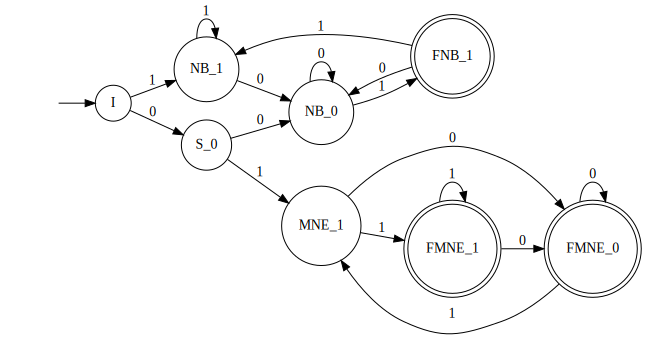

In [10]:
Db01XORe01 = md2mc('''
!! 
!!- The overall algorithm is to case-analyze on whether we began with a 01 or not.
!!- Please see the state names assigned. Once you understand how the state names were designed,
!!- the transitions should make sense.  
!!
DFA         !! This DFA chooses meaningful state names and records the last bit seen
 
!!--- The DFA has to be designed by you
!!--- I'll just tell you the state names I ended up inventing, and my scheme for naming the states
!!--- without giving such state names, I could not have solved this problem!
!!--- In other words, the ENTIRE solution depended on my keeping a clear sense of state names
!!--- and also remembering one bit seen last.

!!--- The state names I chose ---

S_0    : 0 -> NB_0  !! No acceptance upon seeing a 0; record in state name S0
S_0    : 1 -> MNE_1
MNE_1  : 0 -> FMNE_0  !! MNE means "must not end in 01." The _1 remembers the last bit seen 
MNE_1  : 1 -> FMNE_1
NB_1   : 0 -> NB_0  !! NB means "not beginning with 01." The _1 remembers the last bit seen
NB_1   : 1 -> NB_1
NB_0   : 0 -> NB_0  !! Not beginning with 01. Also 0 is the last bit seen
NB_0   : 1 -> FNB_1
FNB_1  : 0 -> NB_0  !! FNB means a final state for the case not beginning with 01. Also '1' seen last
FNB_1  : 1 -> NB_1
FMNE_0 : 0 -> FMNE_0  !! FMNE means a final state and "must not end in 01". Also 0 bit seen last
FMNE_0 : 1 -> MNE_1
FMNE_1 : 0 -> FMNE_0  !! Since we are seeing a 00, we are not ending in 01, so the F status is kept
FMNE_1 : 1 -> FMNE_1
I      : 0 -> S_0
I      : 1 -> NB_1

''')
dotObj_dfa(Db01XORe01, FuseEdges = True)

In [11]:
Sigma={'0','1'}
for i in range(1,120):
    w = nthnumeric(i, Sigma)
    if accepts_dfa(Db01XORe01, w):
        print("DFA Db01XORe01 accepts ", w)
print("DFA Db01XORe01 rejects all other w in the test set")

DFA Db01XORe01 accepts  001
DFA Db01XORe01 accepts  010
DFA Db01XORe01 accepts  011
DFA Db01XORe01 accepts  101
DFA Db01XORe01 accepts  0001
DFA Db01XORe01 accepts  0100
DFA Db01XORe01 accepts  0110
DFA Db01XORe01 accepts  0111
DFA Db01XORe01 accepts  1001
DFA Db01XORe01 accepts  1101
DFA Db01XORe01 accepts  00001
DFA Db01XORe01 accepts  00101
DFA Db01XORe01 accepts  01000
DFA Db01XORe01 accepts  01010
DFA Db01XORe01 accepts  01011
DFA Db01XORe01 accepts  01100
DFA Db01XORe01 accepts  01110
DFA Db01XORe01 accepts  01111
DFA Db01XORe01 accepts  10001
DFA Db01XORe01 accepts  10101
DFA Db01XORe01 accepts  11001
DFA Db01XORe01 accepts  11101
DFA Db01XORe01 accepts  000001
DFA Db01XORe01 accepts  000101
DFA Db01XORe01 accepts  001001
DFA Db01XORe01 accepts  001101
DFA Db01XORe01 accepts  010000
DFA Db01XORe01 accepts  010010
DFA Db01XORe01 accepts  010011
DFA Db01XORe01 accepts  010100
DFA Db01XORe01 accepts  010110
DFA Db01XORe01 accepts  010111
DFA Db01XORe01 accepts  011000
DFA Db01XORe0

 ---> YOUR TASK 1 ENDS HERE <---

## The part below will be retained as such. The TAs will check Presto-1 and Presto-2

They expect empty DFA. Then the student design is correct! Else there is a mistake somewhere.

# Testing out the above machine is not easy; we use REs for that

We will show the power of regular expressions to test out the above machine. You will simply be doing the tests below and ending up with empty DFAs at "Presto-1" and "Presto-2". The TAs will grade wrt those Prestos.

There is no other way to exhaustively test out the DFA!


## We first complement the above machine and make sense

The complement of the above machine must be a DFA that begins with a 01 exactly when it ends with a 01. See if so.

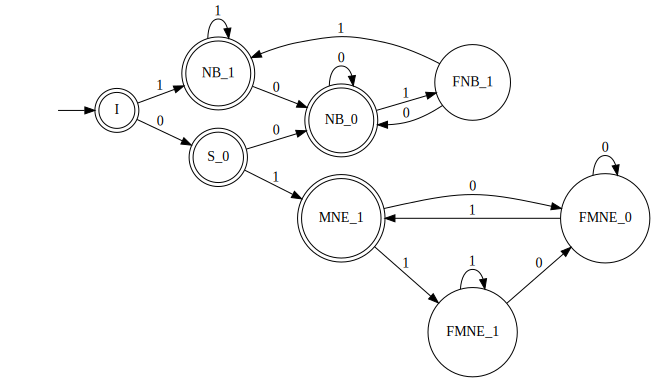

In [12]:
# Its complement must be a machine that begins with 01 exactly when it ends with 01 :-)
# This can be read out and confirmed!
Db01XNORe01 = comp_dfa(Db01XORe01)
dotObj_dfa(Db01XNORe01, FuseEdges = True)

## Check the complement

If the complement looks like it is doing its job, you can let out a mini Presto. But we will do more tests!


## Obtain an RE for begins with 01 AND ends with 01

Generating LALR tables


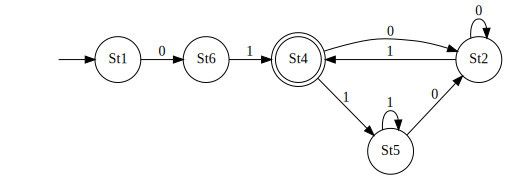

In [13]:
#  This RE "01(''+(0+1)*01)" captures begin with 01 AND ends with 01
Db01ANDe01 = min_dfa(nfa2dfa(re2nfa("01(''+(0+1)*01)")))
dotObj_dfa(Db01ANDe01)

## Obtain DB01XNORe01 minus Db01ANDe01

## Now the DFA must neither begin with 01 nor end with 01. Check.

We can let out a mini Presto if so. It indeed is so!

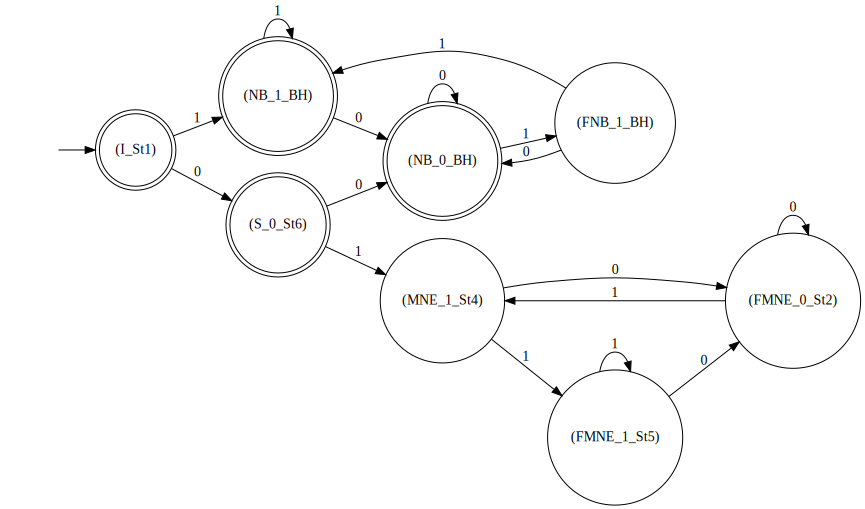

In [14]:
# We now need to perform DbXNORe01 - DB01ANDE01  to get a DFA which neither begins nor ends with 01

Dnb01ANDne01 = intersect_dfa(Db01XNORe01, comp_dfa(Db01ANDe01))
dotObj_dfa(Dnb01ANDne01)

## This is the RE for "begins with 01". Again fool-proof to obtain.

Generating LALR tables


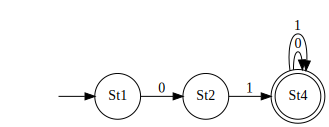

In [15]:
# Now Dnb01ANDne01 must neither begin with 01 nor end with 01
# We can intersect with DFAs that begin with 01 and then DFA that ends with 01 and prove they are empty

Db01 = min_dfa(nfa2dfa(re2nfa("01(0+1)*")))
dotObj_dfa(Db01)

## This is the RE for "ends with 01". Again fool-proof to obtain.

Generating LALR tables


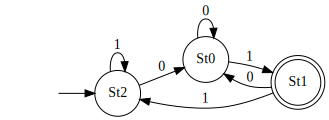

In [16]:
De01 = min_dfa(nfa2dfa(re2nfa("(0+1)*01")))
dotObj_dfa(De01)

## Presto-1 : If the following DFA is empty, it DOES NOT begin with 01

The student is likely right! Check Presto-2 also.


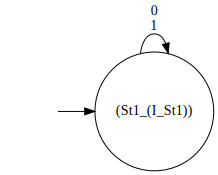

In [17]:
dotObj_dfa(min_dfa(intersect_dfa(Db01, Dnb01ANDne01)), FuseEdges=True)

## Presto-2: If the following DFA is empty, it DOES NOT end with 01

If this check also passes, the student is right !!

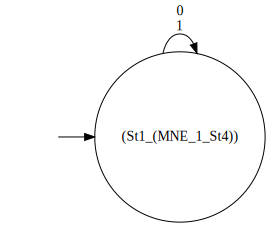

In [18]:
dotObj_dfa(min_dfa(intersect_dfa(De01, Dnb01ANDne01)), FuseEdges=True)

## Since Presto-1 and Presto-2 worked out, we are done !!

# Design a DFA for Numbers arriving MSB-first, equal to 0 modulo 5

Similar to the machine in Section 5.2.3 but with "5" not "3"

 ---> YOUR TASK 2 <---

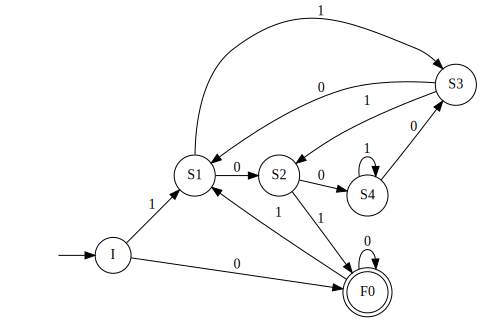

In [20]:
DmsbMod5 = md2mc('''
DFA

I  : 0 -> F0
I  : 1 -> S1
F0 : 0 -> F0
F0 : 1 -> S1
S1 : 0 -> S2
S1 : 1 -> S3
S2 : 0 -> S4
S2 : 1 -> F0
S3 : 0 -> S1
S3 : 1 -> S2
S4 : 0 -> S3
S4 : 1 -> S4
 
''')
    
dotObj_dfa(DmsbMod5, FuseEdges=True) 

In [21]:
Sigma={'0','1'}
for i in range(1,120):
    w = nthnumeric(i, Sigma)
    if accepts_dfa(DmsbMod5, w):
        print("DFA DmsbMod5 accepts ", w, " having value ", int(w, 2))
        
# Printout below must be for numbers modulo 5 = 0

DFA DmsbMod5 accepts  0  having value  0
DFA DmsbMod5 accepts  00  having value  0
DFA DmsbMod5 accepts  000  having value  0
DFA DmsbMod5 accepts  101  having value  5
DFA DmsbMod5 accepts  0000  having value  0
DFA DmsbMod5 accepts  0101  having value  5
DFA DmsbMod5 accepts  1010  having value  10
DFA DmsbMod5 accepts  1111  having value  15
DFA DmsbMod5 accepts  00000  having value  0
DFA DmsbMod5 accepts  00101  having value  5
DFA DmsbMod5 accepts  01010  having value  10
DFA DmsbMod5 accepts  01111  having value  15
DFA DmsbMod5 accepts  10100  having value  20
DFA DmsbMod5 accepts  11001  having value  25
DFA DmsbMod5 accepts  11110  having value  30
DFA DmsbMod5 accepts  000000  having value  0
DFA DmsbMod5 accepts  000101  having value  5
DFA DmsbMod5 accepts  001010  having value  10
DFA DmsbMod5 accepts  001111  having value  15
DFA DmsbMod5 accepts  010100  having value  20
DFA DmsbMod5 accepts  011001  having value  25
DFA DmsbMod5 accepts  011110  having value  30
DFA Dm

## If the above printout produces only mod 5, the student is right!

 ---> YOUR TASK 2 ENDS HERE <---

# Pumping Lemma Without the Pain

## Please study "Pumping Lemma Without the Pain" by studying and working out the problems mentioned [here](https://www.overleaf.com/read/fcsdttjhztyb)

---> YOUR TASK 3 <---

* Summarize the proof in Section 6 in neat bulletted steps (of about 8 bullets)
 - We have to show !Cond(L1) for some language L1
 - We need to find a proper w in L such that |w| is larger that N 
 - We pick w such that it is 0<sup>N</sup>1<sup>N</sup> where N is the length of the DFA
 - We should also view w = xyz where |xy| <= N and y is not epsilon
 - That way when we split w, y will have some 0's, x will have some 0's as well and z will some left-over 0's and then some 1's
 - For i=0 or i>1 we have xy<sup>i</sup>z outside of L1 
 - i=0 gives 0<sup>N-1</sup>1<sup>N</sup> not in L. 
 - i=k where k>1 gives 0<sup>N+k-1</sup>1<sup>N</sup> not in L1.

* Summarize the proof in Section 8 in neat bulletted steps (of about 8 bullets)
 - We have to show !Cond(L1) for some language L1
 - We need to find a proper w in L such that |w| is larger that N 
 - We pick w such that it is (ab)<sup>N</sup>a<sup>N-1</sup> where N is the length of the DFA
 - We should also view w = xyz where |xy| <= N and y is not epsilon
 - That way when we split w, y will have some (ab)'s maybe starting with b or ending with a, x will have some initial repetition of (ab)'s as well and z will have some left-over (ab)'s and then end with a<sup>N-1</sup>'s.
 - We only care to find one couterexample so if we pick i=0 then the y piece gets pulled out
 - This means that either a whole (ab) or just an (a) or just a (b) or some number of (ab)s gets dropped out
 - In all those cases the leading pattern won't be in L1 which proves !Cond(L1) and ultimately that L1 is non-regular
 
 
 ---> YOUR TASK 3 ENDS HERE <---
 
